In [1]:
import csv
import statistics as st
import math
import matplotlib.pyplot as plt
import scipy.stats
import numpy as np
import statistics

In [2]:
def loadCsv(filename):
    lines = csv.reader(open(filename, "r"));
    dataset = list(lines)
    for i in range(len(dataset)):
        dataset[i] = [float(x) for x in dataset[i]]
    return dataset

In [3]:
#The gaussian distribution
def calprob(x, mean, stdev):
    exponent = math.exp(-(math.pow(x-mean,2)/(2*math.pow(stdev,2))))
    return (1 / (math.sqrt(2*math.pi) * stdev*stdev)) * exponent

In [4]:
dataset=loadCsv('Naive-Bayes-Classification-Data.csv')
#split ratio- the size of testing set
size=0.01 
#training set initialized as an empty list
train=[] 
#testing set initialized as an empty list
test=[]  

In [5]:
#splitting the dataset into training and testing
for i in range(int(len(dataset)*size)):
    test.append(dataset[i])
for i in range(int(len(dataset)*size+1),len(dataset)):
    train.append(dataset[i])
print('The lenth of the training set',len(train))
print('The length of the testing set',len(test))

The lenth of the training set 985
The length of the testing set 9


In [6]:
classes=[]
for i in dataset:
    if(i[-1] not in classes):
        #list of all unique class values stored in the list named classes
        classes.append(i[-1]) 
#dictionary that is intended to contain all the rows associated with each class value
classdict={} 
#dictionary that is intended to contain (mean,standard deviation) of every attribute associated with each class value
classdict1={}
#dictionary that is intended to contain probabilites of the given sample falling into the class values
classprob={}
#initialization
for i in classes:
    classdict[i]=[]
    classdict1[i]=[]
    classprob[i]=1

In [7]:
#for each class value, all the rows having that class value are appended
for i in classes:
    for row in train:
        if row[-1]==i:
            classdict[i].append(row[:-1])

In [8]:
#for each class value, the tuple(mean, stdev) for each attribute is appended
for classval,datt in classdict.items():
    for col in zip(*datt):
        classdict1[classval].append((st.mean(col),st.stdev(col)))

In [9]:
print("If diabetes value is 0, patient doesn't have diabetes. If the value is 1, patient has diabetes.")
print("\n") 
count=0 #counter to count the number of correctly classified instances
#calculating class probabilites
for row in test:
    for i in classes:
        classprob[i]=1
    for classval,datt in classdict1.items():
        for i in range(len(row[:-1])):
            mean,std=datt[i]
            x=row[i]
            classprob[classval]*=calprob(x,mean,std) #refer gaussian naive bayes theory
    
    if classprob[0]<classprob[1]:
        print("Test No.:", count+1,"\n") 
        print("For the values of glucose=", row[0], "and bloodpressure=", row[1], ", the patient have diabetes.")
        print("The actual values:[glucose, bloodpressure, diabetes]=", row)
        print("---------------------------------------")
        print("\n") 
    elif classprob[0]>classprob[1]:
        print("Test No.:", count+1,"\n") 
        print("For the values of glucose=", row[0], "and bloodpressure=", row[1], ", the patient doesn't have diabetes.")
        print("The actual values:[glucose, bloodpressure, diabetes]=", row)
        print("---------------------------------------")
        print("\n") 
    #calculating accuracy
    mini=0
    cl=0
    for c,d in classprob.items():
        if d>mini:
            mini=d
            cl=c

    if row[-1]==cl:
        count+=1

If diabetes value is 0, patient doesn't have diabetes. If the value is 1, patient has diabetes.


Test No.: 1 

For the values of glucose= 40.0 and bloodpressure= 85.0 , the patient doesn't have diabetes.
The actual values:[glucose, bloodpressure, diabetes]= [40.0, 85.0, 0.0]
---------------------------------------


Test No.: 2 

For the values of glucose= 40.0 and bloodpressure= 92.0 , the patient doesn't have diabetes.
The actual values:[glucose, bloodpressure, diabetes]= [40.0, 92.0, 0.0]
---------------------------------------


Test No.: 3 

For the values of glucose= 45.0 and bloodpressure= 63.0 , the patient have diabetes.
The actual values:[glucose, bloodpressure, diabetes]= [45.0, 63.0, 1.0]
---------------------------------------


Test No.: 4 

For the values of glucose= 45.0 and bloodpressure= 80.0 , the patient doesn't have diabetes.
The actual values:[glucose, bloodpressure, diabetes]= [45.0, 80.0, 0.0]
---------------------------------------


Test No.: 5 

For the valu

100 100


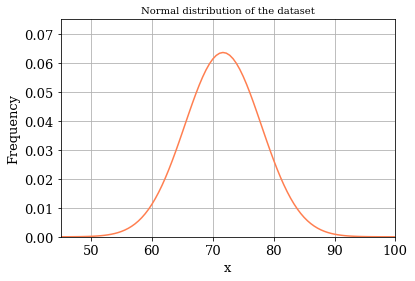

In [70]:
x_min = 45 
x_max = 100
x = np.linspace(x_min, x_max, 100)
y = scipy.stats.norm.pdf(x,mean,std)
print(len(x), len(y))
plt.plot(x,y, color='coral')
plt.grid()
plt.xlim(x_min,x_max)
plt.ylim(0,.075)
plt.title('Normal distribution of the dataset',fontsize=10)
plt.xlabel('x')
plt.ylabel('Frequency')
plt.show()

In [48]:
acc=count/len(test)
print("Accuracy of classifier ",acc)

Accuracy of classifier  1.0


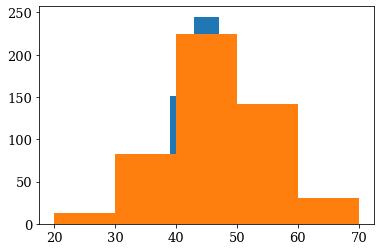

In [87]:
#Histogram of 
gulcose_d=[]
gulcose_nd=[]
for row in train:
    if row[2]==0:
        gulcose_d.append(int(row[0]))
    elif row[2]==1:
        gulcose_nd.append(int(row[0]))
plt.hist(gulcose_d, bins=5)
plt.hist(gulcose_nd, bins=5)
plt.show()

In [ ]:
#if user wants to input the values of gulcose and blood pressure and wants to know 
#that the patient has dibetes or not this section for manual inputs.